# TP Machine Learning : linear regression


In [68]:
#necessary imports
from sklearn import datasets
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## synthetic dataset

In this part, all the code is already written. We ask you the deeply understand what it does and to play with the parameters.

It is highly recommanded to read the documentation there: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [69]:
from sklearn.datasets import make_regression

In [70]:
X, y, coeff = make_regression(n_features=1, bias = 2.0, coef=True, noise=4)


**Question 1:** With the help of the documentation, explain the different parameters. Try with and without noise, with dimension 1, 2 and more.

your answer here

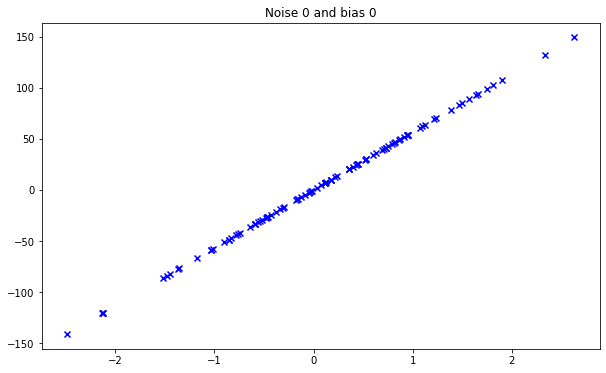

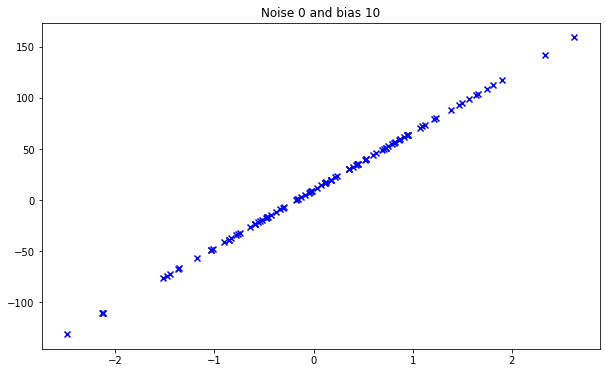

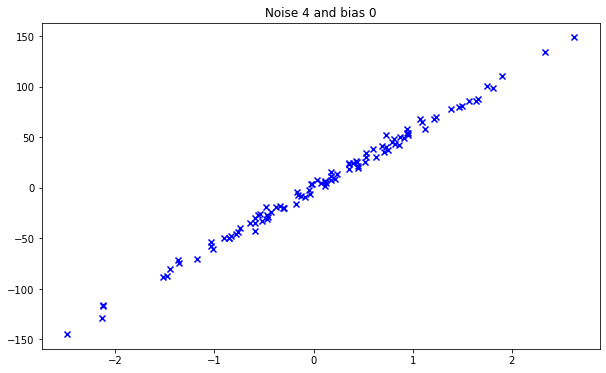

In [71]:
#with dimension 1
#    make_regression generates a random regression problem.
# -> In our example we have two parameters, the number of features and the bias that in this case is:
#    bias = 2 => tetta0
#    features = 1, 2, 3, .. => tetta1, tetta2, tetta3, ....  dim= 1,2,3,....
#    noise => is the noise we have in our model, biger the noise, less linear it will be our model.

X_noise_0, y_noise_0, coeff = make_regression(n_features=1, bias = 0.0, coef=True, noise=0, random_state=6)

plt.figure(figsize=(10, 6))
plt.title("Noise 0 and bias 0")
plt.scatter(X_noise_0, y_noise_0, color = 'b', marker="x")

X_Nonoise_10, y_Nonoise_10, coeff = make_regression(n_features=1, bias = 10.0, coef=True, noise=0, random_state=6)

plt.figure(figsize=(10, 6))
plt.title("Noise 0 and bias 10")
plt.scatter(X_Nonoise_10, y_Nonoise_10, color = 'b', marker="x")

X_bias_0, y_bias_0, coeff = make_regression(n_features=1, bias = 0.0, coef=True, noise=4, random_state=6)


plt.figure(figsize=(10, 6))
plt.title("Noise 4 and bias 0")
plt.scatter(X_bias_0, y_bias_0, color = 'b', marker="x")


### Let's have a look to the data!

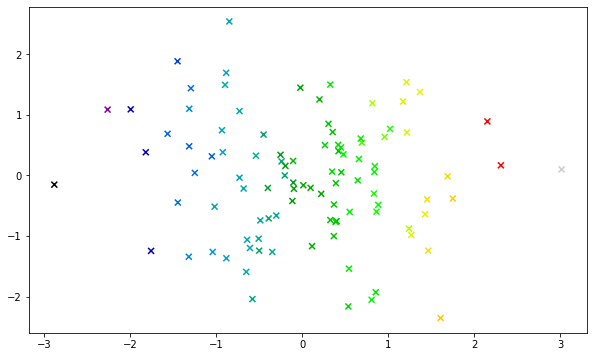

In [72]:
X_2, y_2, coeff = make_regression(n_features=2, bias = 2.0, coef=True, noise=4)



#this cells display 2d features with the colors representing the variations of y values
colors = [cm.nipy_spectral(float(i) / 255) for i in range(256)]

max = np.max(y_2)
min = np.min(y_2)
ycol = 255*(y_2-min)/(max-min)# rapresents the values of y
ycol = ycol.astype('int')

col = [colors[yc] for yc in ycol]
plt.figure(figsize=(10, 6))
plt.scatter(X_2[:, 0], X_2[:, 1], color = col, marker="x")





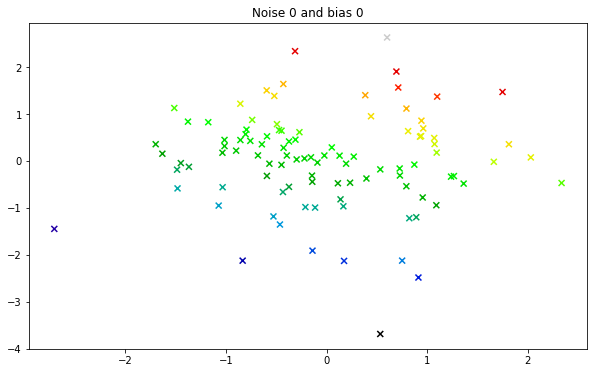

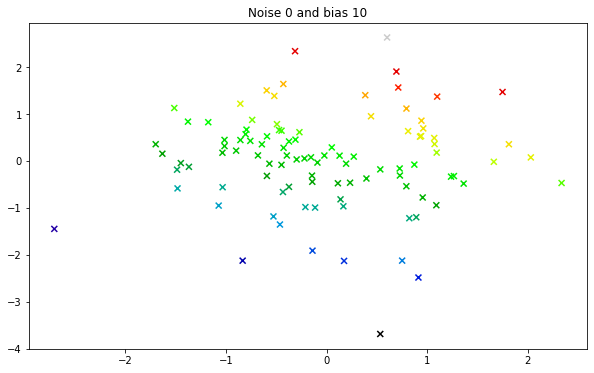

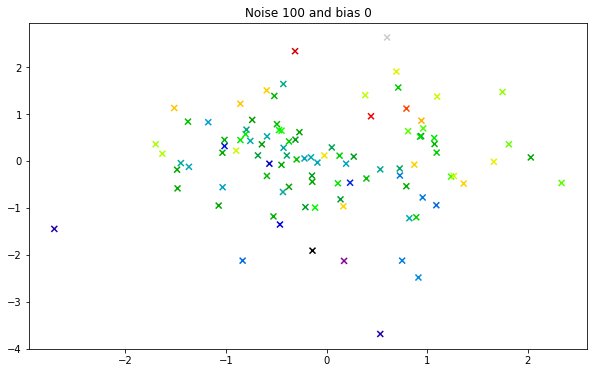

In [73]:
#with dimension 2
#    make_regression generates a random regression problem.
# -> In our example we have two parameters, the number of features and the bias that in this case is:
#    bias = 2 => tetta0
#    features = 1, 2, 3, .. => tetta1, tetta2, tetta3, ....  dim= 1,2,3,....
#    noise => is the noise we have in our model, biger the noise, less linear it will be our model.

X_noise_0, y_noise_0, coeff = make_regression(n_features=2, bias = 0.0, coef=True, noise=0, random_state=6)

max = np.max(y_noise_0)
min = np.min(y_noise_0)
ycol = 255*(y_noise_0-min)/(max-min)# rapresents the values of y
ycol = ycol.astype('int')


col = [colors[yc] for yc in ycol]
plt.figure(figsize=(10, 6))
plt.title("Noise 0 and bias 0")
plt.scatter(X_noise_0[:, 0], X_noise_0[:, 1], color = col, marker="x")


#-------------------------------------------------------------------------------------

X_Nonoise_10, y_Nonoise_10, coeff = make_regression(n_features=2, bias = 10.0, coef=True, noise=0, random_state=6)



max = np.max(y_Nonoise_10)
min = np.min(y_Nonoise_10)
ycol = 255*(y_Nonoise_10-min)/(max-min)# rapresents the values of y
ycol = ycol.astype('int')


col = [colors[yc] for yc in ycol]
plt.figure(figsize=(10, 6))
plt.title("Noise 0 and bias 10")
plt.scatter(X_Nonoise_10[:, 0], X_Nonoise_10[:, 1], color = col, marker="x")



#-------------------------------------------------------------------------------------------

X_bias_0, y_bias_0, coeff = make_regression(n_features=2, bias = 0.0, coef=True, noise=100, random_state=6)

max = np.max(y_bias_0)
min = np.min(y_bias_0)
ycol = 255*(y_bias_0-min)/(max-min)# rapresents the values of y
ycol = ycol.astype('int')


col = [colors[yc] for yc in ycol]

plt.figure(figsize=(10, 6))
plt.title("Noise 100 and bias 0")
plt.scatter(X_bias_0[:, 0], X_bias_0[:, 1], color = col, marker="x")

#I notice in the last case that the data are mixed and in the other plots I see the data(the same colours)
#near each other.
#With the bias don't change, with a big noice the data are mixed

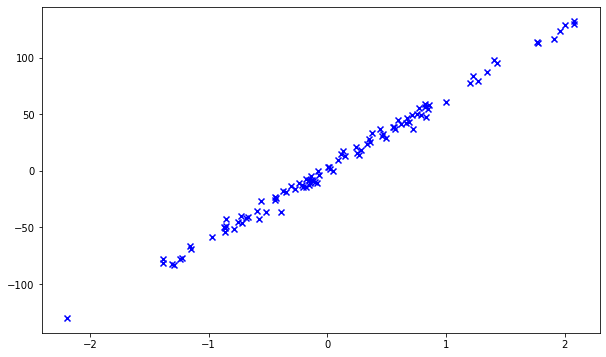

In [74]:
#thist cell will plot 1d data with their y values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'b', marker="x")

### Linear regression

In [75]:
# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [76]:
# construction of linear regression and learning
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluation of the linear regression

In [77]:
print("train score:", lr.score(X_train,y_train)) #1 −u_train/v_train
print("test score:", lr.score(X_test,y_test))    #1 −u_test/v_test

train score: 0.9946578288865222
test score: 0.9943233766391474


**Question 2:** What does this score represent? Is it good? (try to answer using the different options proposed for the dataset creation).

In [80]:
#rapresent
# It's the accuracy of our model
# R^2 = 1 - u/v
#in the both test scores wi have very high score, almost 1, so it's very good

#max value -> 1
#min value -> negative
#0.0 is obtained by a costant model that allways predicts the mean value of labels##


#I'm doing for every data set I've generated above, to se what it changes with different bias and 
#different noise
#1
X, y, coeff = make_regression(n_features=1, bias = 2.0, coef=True, noise=4)

#2
X_noise_0, y_noise_0, coeff = make_regression(n_features=1, bias = 0.0, coef=True, noise=0, random_state=6)

#3
X_Nonoise_10, y_Nonoise_10, coeff = make_regression(n_features=1, bias = 10.0, coef=True, noise=0, random_state=6)

#4
X_bias_0, y_bias_0, coeff = make_regression(n_features=1, bias = 0.0, coef=True, noise=100, random_state=6)



#split the data
#1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#2
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise_0, y_noise_0, test_size=0.4)

#3
X_train_Nonoise_10, X_test_Nonoise_10, y_train_Nonoise_10, y_test_Nonoise_10 = train_test_split(X_Nonoise_10, y_Nonoise_10, test_size=0.4)

#4
X_train_bias_0, X_test_bias_0, y_train_bias_0, y_test_bias_0 = train_test_split(X_bias_0, y_bias_0, test_size=0.4)

# construction of linear regression and learning
#1
lr = LinearRegression()
lr.fit(X_train, y_train)

#2
lr1 = LinearRegression()
lr1.fit(X_train_noise, y_train_noise)

#3
lr2 = LinearRegression()
lr2.fit(X_train_Nonoise_10, y_train_Nonoise_10)

#4
lr3 = LinearRegression()
lr3.fit(X_train_bias_0, y_train_bias_0)

print("It's the first case")
print("train score:", lr.score(X_train,y_train)) #1 −u_train/v_train
print("test score:", lr.score(X_test,y_test))    #1 −u_test/v_test

print("It's the second case")
print("train score:", lr1.score(X_train_noise,y_train_noise)) #1 −u_train/v_train
print("test score:", lr1.score(X_test_noise,y_test_noise))    #1 −u_test/v_test

print("It's the third case")
print("train score:", lr2.score(X_train_Nonoise_10,y_train_Nonoise_10)) #1 −u_train/v_train
print("test score:", lr2.score(X_test_Nonoise_10,y_test_Nonoise_10))    #1 −u_test/v_test

print("It's the forth case")
print("train score:", lr3.score(X_train_bias_0,y_train_bias_0)) #1 −u_train/v_train
print("test score:", lr3.score(X_test_bias_0,y_test_bias_0))    #1 −u_test/v_test



#like I see in the examples below, the second and therd case the accuracy is one because I gave a noise =0
# so the model I generated is perfect.
#In the last case I gave a high noise, so the score is very low, and the model isn't good

It's the first case
train score: 0.9937698306140584
test score: 0.9908513632904112
It's the second case
train score: 1.0
test score: 1.0
It's the third case
train score: 1.0
test score: 1.0
It's the forth case
train score: 0.2337563035925858
test score: 0.11243477773786259


In [83]:
# rmse computation -> root mean square error 
print(math.sqrt(mean_squared_error(y_train,lr.predict(X_train))))
print(math.sqrt(mean_squared_error(y_train_noise,lr1.predict(X_train_noise))))
print(math.sqrt(mean_squared_error(y_train_Nonoise_10,lr2.predict(X_train_Nonoise_10))))
print(math.sqrt(mean_squared_error(y_train_bias_0,lr3.predict(X_train_bias_0))))

#like I se the last one that has a high error, the mean square error root is very high, and in 
#the second and third is very low, noise is = o in the second and third

3.866934401223047
1.3863599305960291e-14
1.4420254318709457e-14
93.4247375956782


We can also compare the true linear coefficients with the coefficients founded by the linear regression:

In [84]:
print(coeff) #true linear coef

56.67967713250513


In [85]:
print(lr.coef_, lr.intercept_) # [tetta1_estimated] tetta0_estimated

[47.63239878] 2.4068065933802703


**Question 3:** Let's plot the line with the data (fill the missing values in this cell)

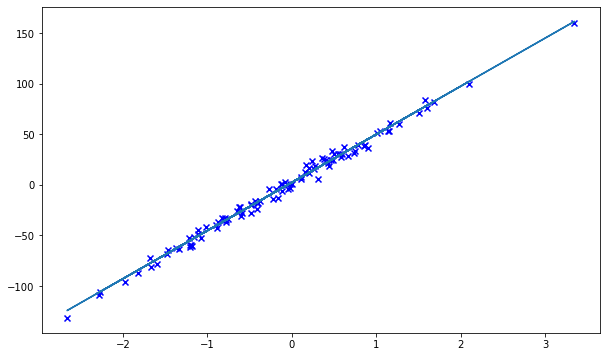

In [86]:
# case of dimension 1
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'b', marker="x")
a = lr.coef_
b = lr.intercept_
x0,y0 = X, a*X + b
## give the coordinates of 2 points in order to draw 
##the line that has been learned
plt.plot(x0,y0)

## dataset: diabetes

In [87]:
# loading the dataset
diab = datasets.load_diabetes()
X = diab.data
y = diab.target

**Question 4:** how many data ?

In [88]:
#import numpy as np
# answer here
diab.data.shape[0]

442

**Question 5**: type of data ? dimension of data ? type of labels ? 

In [89]:
print('Type of data: ', X.dtype)
print('Type of labels: ', y.dtype)
print('Dimension of type: ', diab.data.shape[1])

Type of data:  float64
Type of labels:  float64
Dimension of type:  10


**Question 5bis**: What are the features ? 

In [27]:
print(diab.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


**Question 6a:** Split train/test dataset

In [28]:
# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


**Question 6b:** How many train data? How many test data?

In [27]:
print(len(X_train))#train data
print(X_test.data.shape[0])#test data

265
177


**Question 7:** Linear regression. Create a default linear regression and learn this regression.

In [29]:
lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

**Question 8a:** Print the score. What do they represent? 

In [94]:
print("train score:", lr.score(X_train,y_train)) 
print("test score:", lr.score(X_test,y_test)) 
#the score is high, not 1 but close to 1 so we can say 
#that we have a good linear model
#R^2 = 1 - u/v -> how good fits the model 

train score: 0.6244994536436943
test score: 0.2842456662227394


**Question 8b:** What are the mse and rmse values?

In [91]:
#mse <- mean squeare error
#rmse <- root mean square error

#Mean squared error (MSE) measures the amount of error in statistical models.
#root mean square error (RMSE)is the square root of the mean squared error between the predicted and actual values.

print("mse", mean_squared_error(y_train,lr.predict(X_train)))
print("rmse", math.sqrt(mean_squared_error(y_train,lr.predict(X_train))))

mse 14.953181663362244
rmse 3.866934401223047


**Question 9:** How could you test a non linear regression as for example a second degree polynom 

In [92]:
from sklearn.preprocessing import PolynomialFeatures

polyniam = PolynomialFeatures(2)

polyniam_feat = polyniam.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(polyniam_feat, y, test_size=0.4, random_state = 50)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("iris score:", lr.score(X_train,y_train)) 
print("iris score:", lr.score(X_test,y_test))

iris score: 0.6244994536436943
iris score: 0.2842456662227394
